In [617]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dateutil import parser
import re
warnings.filterwarnings('ignore')


In [618]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\archive\movies.csv")

In [619]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [620]:
# columns is data
data.shape

(7668, 15)

In [621]:
# columns in data
data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [622]:
#renaming some of the column names so they make sense
data=data.rename(columns={'name':'MovieName','released':'ReleaseDate','year':'ReleaseYear'})

In [623]:
# getting information about each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MovieName    7668 non-null   object 
 1   rating       7591 non-null   object 
 2   genre        7668 non-null   object 
 3   ReleaseYear  7668 non-null   int64  
 4   ReleaseDate  7666 non-null   object 
 5   score        7665 non-null   float64
 6   votes        7665 non-null   float64
 7   director     7668 non-null   object 
 8   writer       7665 non-null   object 
 9   star         7667 non-null   object 
 10  country      7665 non-null   object 
 11  budget       5497 non-null   float64
 12  gross        7479 non-null   float64
 13  company      7651 non-null   object 
 14  runtime      7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [624]:
#Chechind the null values
data.isna().sum()


MovieName         0
rating           77
genre             0
ReleaseYear       0
ReleaseDate       2
score             3
votes             3
director          0
writer            3
star              1
country           3
budget         2171
gross           189
company          17
runtime           4
dtype: int64

In [625]:
for col in data.columns:
    pct_missing=round(np.mean(data[col].isna()),2)
    print('{}-{}%'.format(col,pct_missing))

MovieName-0.0%
rating-0.01%
genre-0.0%
ReleaseYear-0.0%
ReleaseDate-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.28%
gross-0.02%
company-0.0%
runtime-0.0%


In [626]:
# filling the missing values
data.rating.fillna('Unrated',inplace=True)

In [627]:
data.rating.isna().sum()

0

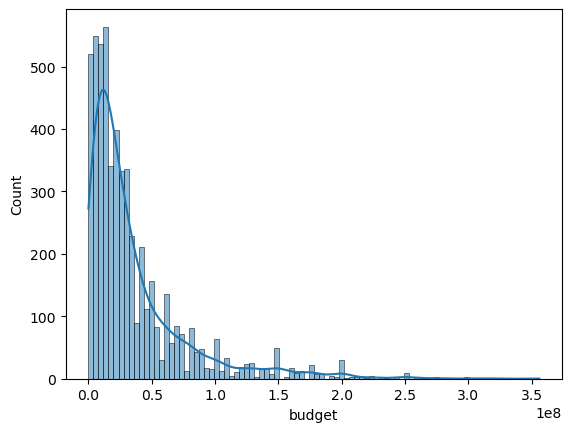

In [628]:
#to check the skewness of the distribution
sns.histplot(data['budget'].dropna(), kde=True)  # KDE curve for visualization
plt.show()

In [629]:
skewness = data['budget'].skew()
print(f"Skewness: {skewness}")

Skewness: 2.453513476195313


In [630]:
# as we can see the data is rightskewed means longer tail on the right right so its better to fill the budget 
# column with the median as it is less affected by the extreme outliers and itrepresents the centre of the data
# more accurately than the mean

# filling the budget with median
data.budget.fillna(data.budget.median(), inplace=True)
data.budget.isna().sum()

0

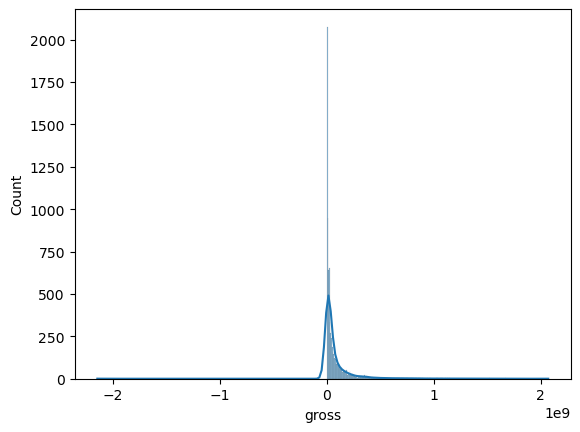

In [470]:

sns.histplot(data['gross'].dropna(), kde=True)  # KDE curve for visualization
plt.show()

In [631]:
skewness = data['budget'].skew()
print(f"Skewness: {skewness}")

Skewness: 3.0808230918897435


In [632]:
# gross is also highly right skewed we should opt median to fill the null values.

data.gross.fillna(data.gross.median(), inplace=True)
data.budget.isna().sum()

0

In [633]:
# changing the datatype of Budget and gross columns from float to int so that it looks better
data.budget=data.budget.astype(int)
data.budget.dtypes

dtype('int32')

In [634]:
# we will do the same as above to the gross column
data.gross=data.gross.astype(float)
data.gross.dtypes

dtype('float64')

In [582]:
data[['ReleaseDate']] # since 'Releasedate' is not the appropriate format, so first we have to format it and then 
# we wii change its datatype from object to datetime

,ReleaseDate
0,"June 13, 1980 (United States)"
1,"July 2, 1980 (United States)"
2,"June 20, 1980 (United States)"
3,"July 2, 1980 (United States)"
4,"July 25, 1980 (United States)"
5,"May 9, 1980 (United States)"
6,"June 20, 1980 (United States)"
7,"December 19, 1980 (United States)"
8,"June 19, 1981 (United States)"
9,"May 16, 1980 (United States)"


In [635]:
# here we are extracting the date using regex and and putting it into three invidual columns.
data[['month','date','year']]=data['ReleaseDate'].str.extract(r'\s*(\w*)\s*(\d*),?\s*(\d{4}+)')



In [636]:
# as we can see the three columns got created month date year
data.head()

,MovieName,rating,genre,ReleaseYear,ReleaseDate,score,votes,director,writer,star,country,budget,gross,company,runtime,month,date,year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,June,13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,July,2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,June,20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,July,2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,July,25,1980


In [585]:
# now we are filling the null and empty strings in month , date and and year
data['date'] = data['date'].replace('', '1').fillna('1')
data['month']=data['month'].replace('','January').fillna('January')
data['year']=data['year'].replace('','2006').fillna('2006')
# or we could do the same
#data.loc[(data.month='')|(data.month=nan),'month']='January---this is more efficient way with resoect to memmory management

In [ ]:
#data.month.unique()
#data.date.unique()
#data.year.unique()

In [586]:
#In some places for the month of february the date is 29 which will create problem while 
#converitng tha datatype to datetime so we are changing the date to 28 from 29
data.loc[(data.month=='February')&(data.date=='29'),'date']=28

In [587]:
# Finally we got every date month and year now we will join the three columns to create Release date 
#and that we will assign to Releasedate column

data['ReleaseDate']=data[['month','date','year']].astype(str).agg('-'.join,axis=1)

In [588]:
#As we got the release date in the coorect format and now can change to datetime format

data.ReleaseDate=pd.to_datetime(data.ReleaseDate)

In [486]:
data.isna().sum()

MovieName       0
rating          0
genre           0
ReleaseYear     0
ReleaseDate     0
score           3
votes           3
director        0
writer          3
star            1
country         3
budget          0
gross           0
company        17
runtime         4
month           0
date            0
year            0
dtype: int64

In [611]:
data.sort_values(by=['gross'],inplace=False, ascending=False)
data.head()

,MovieName,rating,genre,ReleaseDate,score,votes,director,writer,star,country,budget,gross,company,runtime,year
0,The Shining,R,Drama,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980


In [591]:
#If you want to see all the rows of the data we can use thr set_option function
pd.set_option('display.max_rows', None)

In [592]:
#checking the duplicates
df=data.groupby(['MovieName','genre','ReleaseDate','director']).size().reset_index(name='count')
df=df[df['count']>1]
df
#so there are no duplicates

,MovieName,genre,ReleaseDate,director,count


In [534]:
data.gross.isna().sum()

0

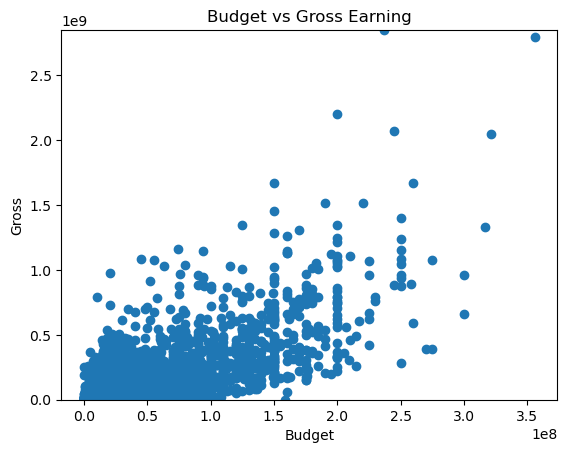

In [593]:
# we are plotting the scatter plot between two features to the the relation between the features
plt.scatter(x=data['budget'], y=data['gross'])
plt.ylim(0, max(data['gross']))
plt.title("Budget vs Gross Earning")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [ ]:
#plot the budget vs gross using seaborn
# as we can see below the the line is linear means the two features have linear relatioship

(0.0, 2847246204.0)

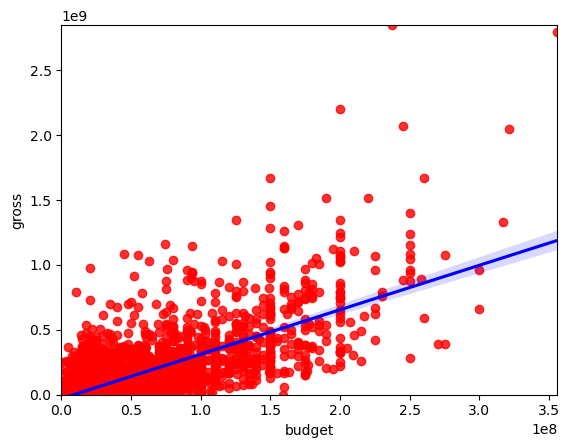

In [594]:
sns.regplot(x='budget',y='gross',data=data,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.xlim(0, max(data['budget']) + 1)  # Adjusting the upper limit a bit for better visualization
plt.ylim(0, max(data['gross']) + 1) 

In [595]:
# dropping the columns which are not useful
data.drop(columns=['ReleaseYear','month','date'], inplace=True)

In [596]:
#here we are looking for the correlation between all the numerical features
correlation_matrix=data.corr().round(2)
correlation_matrix

,score,votes,budget,gross,runtime
score,1.00,0.41,0.06,0.19,0.40
votes,0.41,1.00,0.46,0.63,0.31
budget,0.06,0.46,1.00,0.75,0.27
gross,0.19,0.63,0.75,1.00,0.25
runtime,0.40,0.31,0.27,0.25,1.00


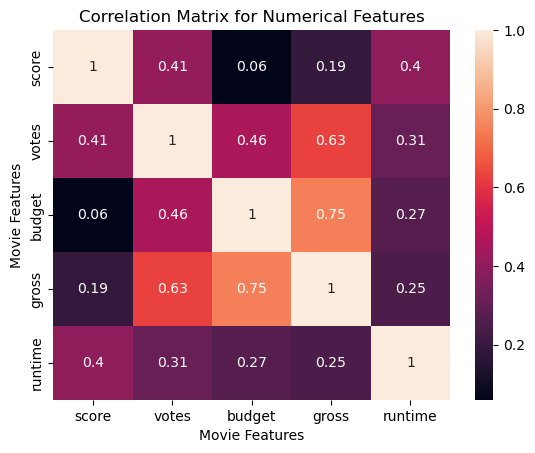

In [597]:
#Plotting  a heatmap to visualize the correlation between all the features
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numerical Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [641]:
# As we know that big company can have high correlation with the Gross but to see that correlation the comapany 
#has to be numerical column, So we change the company to categorical
# we are making the copy of the data and making the changes in the copy 

df_numerized=data.copy()



In [642]:
# Making all the columns numeriacl to see the correlation
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtypes=='object':
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        

In [643]:
# as we can see all the columns are numerically categorized
df_numerized
df_numerized.head()

,MovieName,rating,genre,ReleaseYear,ReleaseDate,score,votes,director,writer,star,country,budget,gross,company,runtime,month,date,year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0,7,5,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0,6,12,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0,7,13,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0,6,12,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0,6,18,0


In [604]:
df_numerized.corr(method='pearson')

,MovieName,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year
MovieName,1.000000,-0.013245,0.016355,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020921,0.005533,0.009211,0.010392,0.010814
rating,-0.013245,1.000000,0.136017,0.020072,-0.001867,0.011946,-0.004138,-0.000633,-0.011110,-0.150675,-0.132914,-0.101201,0.059717,0.037101
genre,0.016355,0.136017,1.000000,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.328484,-0.235650,-0.071067,-0.052711,-0.077819
score,0.017097,0.020072,0.027965,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.061979,0.186258,0.001030,0.399451,0.105894
votes,0.013088,-0.001867,-0.145307,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.460932,0.630757,0.133204,0.309212,0.218430
director,0.009079,0.011946,-0.015258,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.003584,-0.014441,0.004404,0.017624,-0.020428
writer,0.009081,-0.004138,0.006567,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.030641,-0.023519,0.005646,-0.003511,-0.008662
star,0.006472,-0.000633,-0.005477,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.018534,-0.002717,0.012442,0.010174,-0.027599
country,-0.010737,-0.011110,-0.037615,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.082334,0.092129,0.095548,-0.078412,-0.081142
budget,0.020921,-0.150675,-0.328484,0.061979,0.460932,-0.003584,-0.030641,-0.018534,0.082334,1.000000,0.745552,0.167250,0.273363,0.284038


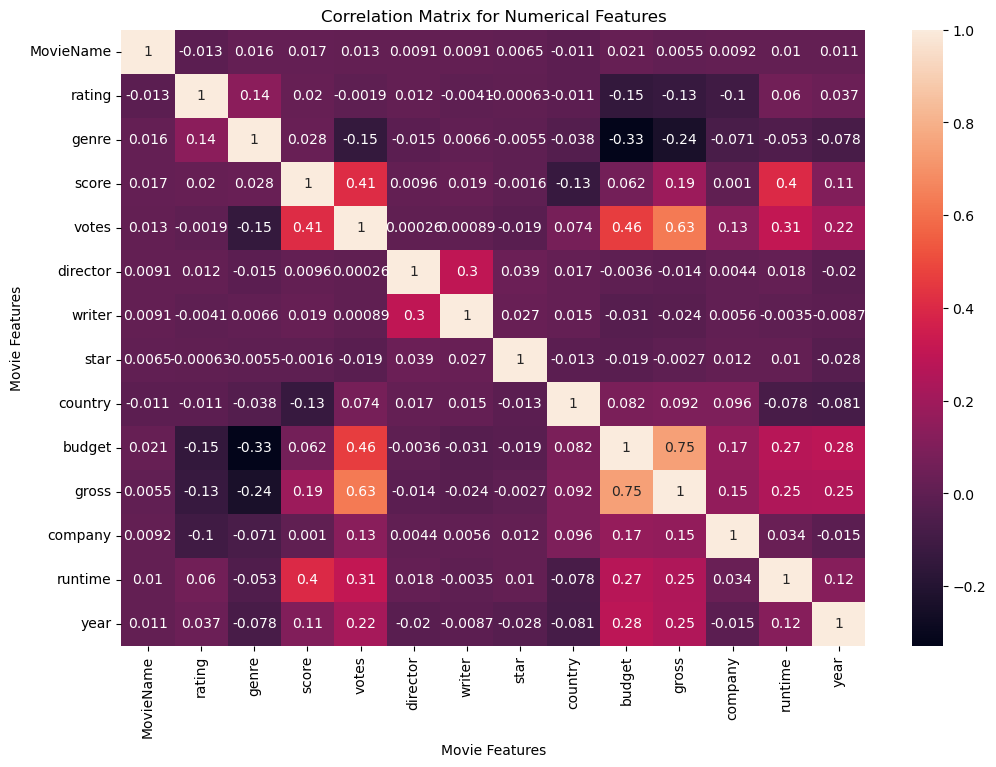

In [603]:
#Correlation among all the columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerized.corr(method='pearson'),annot=True)
plt.title("Correlation Matrix for Numerical Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [606]:
corr_matrix=df_numerized.corr(method='pearson')
corr_pairs=corr_matrix.unstack()
corr_pairs

MovieName  MovieName    1.000000
           rating      -0.013245
           genre        0.016355
           score        0.017097
           votes        0.013088
           director     0.009079
           writer       0.009081
           star         0.006472
           country     -0.010737
           budget       0.020921
           gross        0.005533
           company      0.009211
           runtime      0.010392
           year         0.010814
rating     MovieName   -0.013245
           rating       1.000000
           genre        0.136017
           score        0.020072
           votes       -0.001867
           director     0.011946
           writer      -0.004138
           star        -0.000633
           country     -0.011110
           budget      -0.150675
           gross       -0.132914
           company     -0.101201
           runtime      0.059717
           year         0.037101
genre      MovieName    0.016355
           rating       0.136017
          

In [607]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre      budget      -0.328484
budget     genre       -0.328484
genre      gross       -0.235650
gross      genre       -0.235650
rating     budget      -0.150675
budget     rating      -0.150675
votes      genre       -0.145307
genre      votes       -0.145307
score      country     -0.133348
country    score       -0.133348
gross      rating      -0.132914
rating     gross       -0.132914
           company     -0.101201
company    rating      -0.101201
year       country     -0.081142
country    year        -0.081142
runtime    country     -0.078412
country    runtime     -0.078412
year       genre       -0.077819
genre      year        -0.077819
company    genre       -0.071067
genre      company     -0.071067
           runtime     -0.052711
runtime    genre       -0.052711
country    genre       -0.037615
genre      country     -0.037615
budget     writer      -0.030641
writer     budget      -0.030641
star       year        -0.027599
year       star        -0.027599
gross     

In [610]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes      gross        0.630757
gross      votes        0.630757
           budget       0.745552
budget     gross        0.745552
MovieName  MovieName    1.000000
company    company      1.000000
gross      gross        1.000000
budget     budget       1.000000
country    country      1.000000
star       star         1.000000
writer     writer       1.000000
director   director     1.000000
votes      votes        1.000000
score      score        1.000000
genre      genre        1.000000
rating     rating       1.000000
runtime    runtime      1.000000
year       year         1.000000
dtype: float64

In [ ]:
# so we could see that the budget and votes has highest correlation with gross
